# Automobile Data: Preprocessing, EDA, and Price Prediction

## 1. Introduction

This project is a comprehensive walkthrough of the data science workflow, focusing on data cleaning, exploratory data analysis (EDA), and machine learning model development. The primary objective is to predict the price of automobiles based on their various features.

### Dataset
The project uses the "Automobile Data Set" from the UCI Machine Learning Repository. This dataset contains 26 attributes for 205 different car models, including technical specifications (like engine size, horsepower) and categorical features (like make, fuel type).

### Project Goals
* **Data Cleaning & Preprocessing:** Handle missing values, correct data types, and transform features (e.g., MPG to L/100km).
* **Exploratory Data Analysis (EDA):** Use visualizations to understand feature distributions and their relationships with price.
* **Feature Engineering:** Apply techniques like one-hot encoding for categorical variables to prepare the data for modeling.
* **Model Development:** Implement a `ColumnTransformer` and `Pipeline` to prevent data leakage and create a reproducible workflow.
* **Model Comparison:** Build and evaluate a **Simple Linear Regression** model and a more complex **Random Forest Regressor** to compare their performance.

### Importing necessary modules

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
import seaborn as sns
from scipy.stats import pearsonr

In [2]:
# Reading csv file into a Pandas DataFrame
file_path='Raw_Automobile_dataset.csv'
Headers=["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
df=pd.read_csv(file_path,names=Headers)

### Statistical analysis using describe and other function

In [3]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [5]:
# Replacing all the '?' with np.nan
df.replace('?',np.nan,inplace=True)

In [6]:
# Checking for missing values in each column
missing_values=df.isnull().sum()
missing_values

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

### Replacing missing values in features with mean and mode

In [7]:
normalized_avg=df['normalized-losses'].astype('float').mean()
df['normalized-losses']=df['normalized-losses'].fillna(normalized_avg)
df['normalized-losses']=df['normalized-losses'].astype('float')

In [8]:
df['num-of-doors']=df['num-of-doors'].replace('?',np.nan)
avg_num_of_doors=df['num-of-doors'].mode()
df['num-of-doors'] = df['num-of-doors'].fillna(avg_num_of_doors[0])
print(df['num-of-doors'].unique())

['two' 'four']


In [9]:
avg_bore=df['bore'].astype('float').mean()
avg_bore=np.round(avg_bore,2)
avg_bore

np.float64(3.33)

In [10]:
df['bore']=df['bore'].fillna(avg_bore)
df['bore']=df['bore'].astype('float')

In [11]:
avg_stroke=df['stroke'].astype('float').mean()
avg_stroke

np.float64(3.255422885572139)

In [12]:
df['stroke']=df['stroke'].fillna(avg_stroke)
df['stroke']=np.round(df['stroke'],2)
df['stroke']=df['stroke'].astype('float')

In [13]:
avg_horsepower=df['horsepower'].astype('float').mean()
df['horsepower']=df['horsepower'].fillna(avg_horsepower)
df['horsepower']=df['horsepower'].astype('float')
df['horsepower']=np.round(df['horsepower'],2)

In [14]:
df['peak-rpm']=df['peak-rpm'].replace(np.nan,df['peak-rpm'].astype('float').mean())
df['peak-rpm']=df['peak-rpm'].astype('float')

### Droping rows that does not have price value

In [15]:
df=df.dropna(subset=['price'])
df['price']=df['price'].astype('float')
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


### Data Scaling using simple scale function 

In [16]:
df[['height','width','length']]

,height,width,length
0,48.8,64.1,168.8
1,48.8,64.1,168.8
2,52.4,65.5,171.2
3,54.3,66.2,176.6
4,54.3,66.4,176.6
...,...,...,...
200,55.5,68.9,188.8
201,55.5,68.8,188.8
202,55.5,68.9,188.8
203,55.5,68.9,188.8


In [17]:
df['height']=df['height']/df['height'].max()
df['height'].to_frame()

,height
0,0.816054
1,0.816054
2,0.876254
3,0.908027
4,0.908027
...,...
200,0.928094
201,0.928094
202,0.928094
203,0.928094


In [18]:
df['width']=df['width']/df['width'].max()
df['width'].to_frame()

,width
0,0.890278
1,0.890278
2,0.909722
3,0.919444
4,0.922222
...,...
200,0.956944
201,0.955556
202,0.956944
203,0.956944


In [19]:
df['length']=df['length']/df['length'].max()
df['length'].to_frame()

,length
0,0.811148
1,0.811148
2,0.822681
3,0.848630
4,0.848630
...,...
200,0.907256
201,0.907256
202,0.907256
203,0.907256


### Data standardization


In [20]:
# Converting miles per gallon into l/100 km
df['City L/100km']=235/df['city-mpg']
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,City L/100km
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556


In [21]:
# Converting miles per gallon into l/100 km
df['highway-mpg']=235/df['highway-mpg']
df.rename(columns={'highway-mpg':'highway L/100km'},inplace=True)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway L/100km,price,City L/100km
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,8.703704,13495.0,11.190476
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,8.703704,16500.0,11.190476
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154.0,5000.0,19,9.038462,16500.0,12.368421
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102.0,5500.0,24,7.833333,13950.0,9.791667
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115.0,5500.0,18,10.681818,17450.0,13.055556


In [22]:
df.drop('city-mpg',axis=1,inplace=True)
df.head()


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,highway L/100km,price,City L/100km
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,8.703704,13495.0,11.190476
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,8.703704,16500.0,11.190476
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,9.038462,16500.0,12.368421
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,7.833333,13950.0,9.791667
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,10.681818,17450.0,13.055556


In [23]:
dummy_varible1=pd.get_dummies(df['drive-wheels'])
df=pd.concat([df,dummy_varible1],axis=1)
df.drop('drive-wheels',axis=1,inplace=True)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,engine-location,wheel-base,length,...,stroke,compression-ratio,horsepower,peak-rpm,highway L/100km,price,City L/100km,4wd,fwd,rwd
0,3,122.0,alfa-romero,gas,std,two,convertible,front,88.6,0.811148,...,2.68,9.0,111.0,5000.0,8.703704,13495.0,11.190476,False,False,True
1,3,122.0,alfa-romero,gas,std,two,convertible,front,88.6,0.811148,...,2.68,9.0,111.0,5000.0,8.703704,16500.0,11.190476,False,False,True
2,1,122.0,alfa-romero,gas,std,two,hatchback,front,94.5,0.822681,...,3.47,9.0,154.0,5000.0,9.038462,16500.0,12.368421,False,False,True
3,2,164.0,audi,gas,std,four,sedan,front,99.8,0.848630,...,3.40,10.0,102.0,5500.0,7.833333,13950.0,9.791667,False,True,False
4,2,164.0,audi,gas,std,four,sedan,front,99.4,0.848630,...,3.40,8.0,115.0,5500.0,10.681818,17450.0,13.055556,True,False,False


In [24]:
dummy_var2=pd.get_dummies(df['engine-location'])
df=pd.concat([df,dummy_var2],axis=1)
df.drop('engine-location',axis=1,inplace=True)
df.rename(columns={'front':'Front Engine-location','rear':'Rear Engine-location'},inplace=True)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,wheel-base,length,width,...,horsepower,peak-rpm,highway L/100km,price,City L/100km,4wd,fwd,rwd,Front Engine-location,Rear Engine-location
0,3,122.0,alfa-romero,gas,std,two,convertible,88.6,0.811148,0.890278,...,111.0,5000.0,8.703704,13495.0,11.190476,False,False,True,True,False
1,3,122.0,alfa-romero,gas,std,two,convertible,88.6,0.811148,0.890278,...,111.0,5000.0,8.703704,16500.0,11.190476,False,False,True,True,False
2,1,122.0,alfa-romero,gas,std,two,hatchback,94.5,0.822681,0.909722,...,154.0,5000.0,9.038462,16500.0,12.368421,False,False,True,True,False
3,2,164.0,audi,gas,std,four,sedan,99.8,0.848630,0.919444,...,102.0,5500.0,7.833333,13950.0,9.791667,False,True,False,True,False
4,2,164.0,audi,gas,std,four,sedan,99.4,0.848630,0.922222,...,115.0,5500.0,10.681818,17450.0,13.055556,True,False,False,True,False


In [25]:
dummy_var3=pd.get_dummies(df['fuel-type'])
df=pd.concat([df,dummy_var3],axis=1)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,wheel-base,length,width,...,highway L/100km,price,City L/100km,4wd,fwd,rwd,Front Engine-location,Rear Engine-location,diesel,gas
0,3,122.0,alfa-romero,gas,std,two,convertible,88.6,0.811148,0.890278,...,8.703704,13495.0,11.190476,False,False,True,True,False,False,True
1,3,122.0,alfa-romero,gas,std,two,convertible,88.6,0.811148,0.890278,...,8.703704,16500.0,11.190476,False,False,True,True,False,False,True
2,1,122.0,alfa-romero,gas,std,two,hatchback,94.5,0.822681,0.909722,...,9.038462,16500.0,12.368421,False,False,True,True,False,False,True
3,2,164.0,audi,gas,std,four,sedan,99.8,0.848630,0.919444,...,7.833333,13950.0,9.791667,False,True,False,True,False,False,True
4,2,164.0,audi,gas,std,four,sedan,99.4,0.848630,0.922222,...,10.681818,17450.0,13.055556,True,False,False,True,False,False,True


In [26]:
df['4wd']=df['4wd'].astype(int)
df['fwd']=df['fwd'].astype(int)
df['rwd']=df['rwd'].astype(int)
df['Front Engine-location']=df['Front Engine-location'].astype(int)
df['Rear Engine-location']=df['Rear Engine-location'].astype(int)
df['diesel']=df['diesel'].astype(int)
df['gas']=df['gas'].astype(int)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,wheel-base,length,width,...,highway L/100km,price,City L/100km,4wd,fwd,rwd,Front Engine-location,Rear Engine-location,diesel,gas
0,3,122.0,alfa-romero,gas,std,two,convertible,88.6,0.811148,0.890278,...,8.703704,13495.0,11.190476,0,0,1,1,0,0,1
1,3,122.0,alfa-romero,gas,std,two,convertible,88.6,0.811148,0.890278,...,8.703704,16500.0,11.190476,0,0,1,1,0,0,1
2,1,122.0,alfa-romero,gas,std,two,hatchback,94.5,0.822681,0.909722,...,9.038462,16500.0,12.368421,0,0,1,1,0,0,1
3,2,164.0,audi,gas,std,four,sedan,99.8,0.848630,0.919444,...,7.833333,13950.0,9.791667,0,1,0,1,0,0,1
4,2,164.0,audi,gas,std,four,sedan,99.4,0.848630,0.922222,...,10.681818,17450.0,13.055556,1,0,0,1,0,0,1


### Data Binning

In [27]:
bin=np.linspace(min(df['price']),max(df['price']),4)
label=['Low','Meduim','high']
df['Binned-price']=pd.cut(df['price'],bin,labels=label,include_lowest=True)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,wheel-base,length,width,...,price,City L/100km,4wd,fwd,rwd,Front Engine-location,Rear Engine-location,diesel,gas,Binned-price
0,3,122.0,alfa-romero,gas,std,two,convertible,88.6,0.811148,0.890278,...,13495.0,11.190476,0,0,1,1,0,0,1,Low
1,3,122.0,alfa-romero,gas,std,two,convertible,88.6,0.811148,0.890278,...,16500.0,11.190476,0,0,1,1,0,0,1,Low
2,1,122.0,alfa-romero,gas,std,two,hatchback,94.5,0.822681,0.909722,...,16500.0,12.368421,0,0,1,1,0,0,1,Low
3,2,164.0,audi,gas,std,four,sedan,99.8,0.848630,0.919444,...,13950.0,9.791667,0,1,0,1,0,0,1,Low
4,2,164.0,audi,gas,std,four,sedan,99.4,0.848630,0.922222,...,17450.0,13.055556,1,0,0,1,0,0,1,Low


Text(0.5, 1.0, 'Binned price')

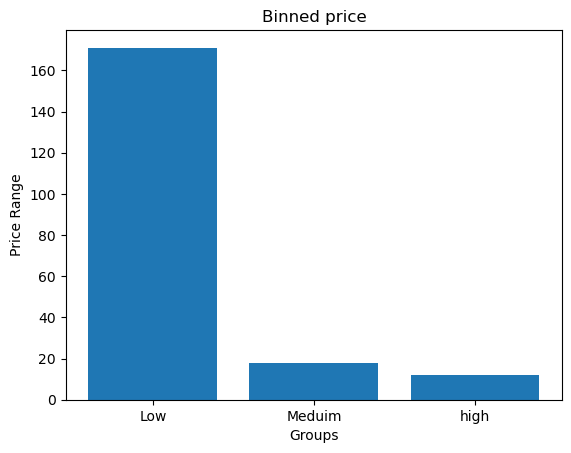

In [28]:
# Creating Visualization for Binned price
plt.bar(label,df['Binned-price'].value_counts())
plt.xlabel('Groups')
plt.ylabel('Price Range')
plt.title('Binned price')

In [29]:
# Binning horsepower
df['horsepower'] = df['horsepower'].replace('?', np.nan)
df['horsepower'] = pd.to_numeric(df['horsepower'])
df = df.dropna(subset=['horsepower'])
bin1 = np.linspace(df['horsepower'].min(), df['horsepower'].max(), 4)
label2 = ['Low', 'Medium', 'High']
df['binned-horsepower'] = pd.cut(df['horsepower'], bins=bin1, labels=label2, include_lowest=True)


Text(0.5, 1.0, 'Hoursepower')

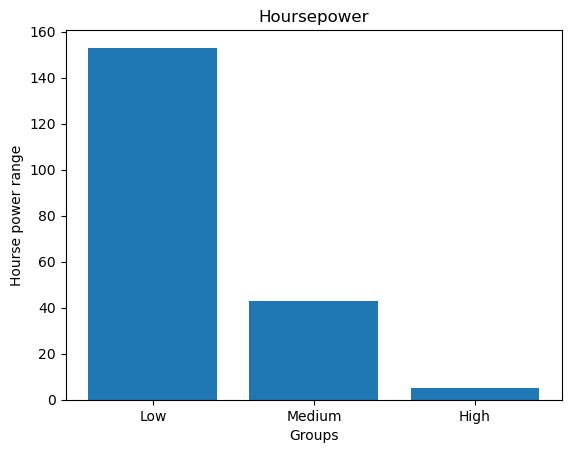

In [30]:
# Creating Visualization for Binned horsepower
plt.bar(label2,df['binned-horsepower'].value_counts())
plt.xlabel('Groups')
plt.ylabel('Hourse power range')
plt.title('Hoursepower')

### Finding Co-relation of varaible against price 



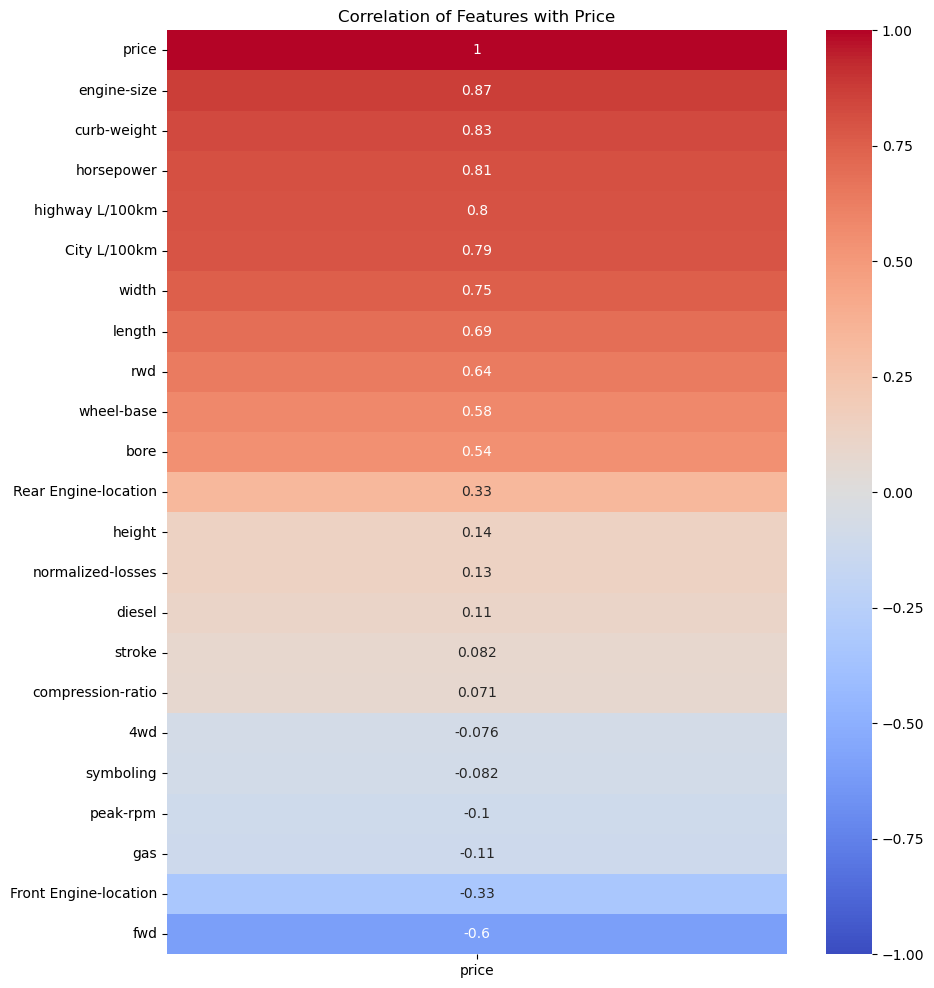

In [31]:
numeric_df=df.select_dtypes(include=['float64','int64'])
corr_matrix = numeric_df.corr()
price_corr = corr_matrix['price'].sort_values(ascending=False)

plt.figure(figsize=(10, 12))
sns.heatmap(price_corr.to_frame(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation of Features with Price")
plt.show()

### Regplot
1. curb weight
2. bore
3. stroke
4. horsepower
5. peak-rpm
6. highway l/100km
7. city l/100km 

### Boxplot
1. fuel type
2. aspiration



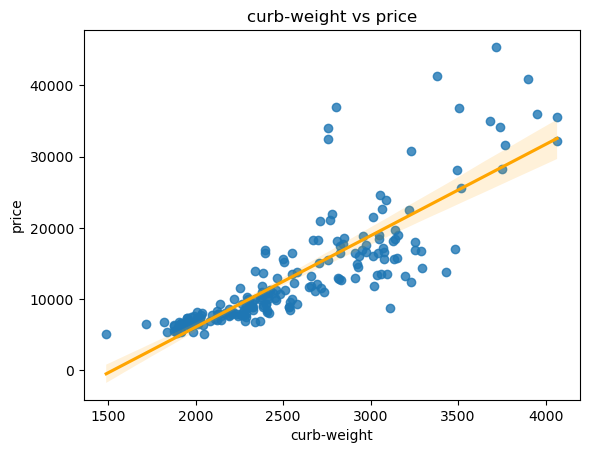

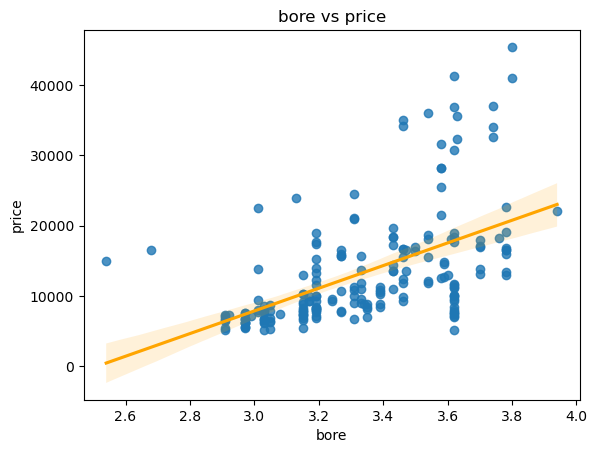

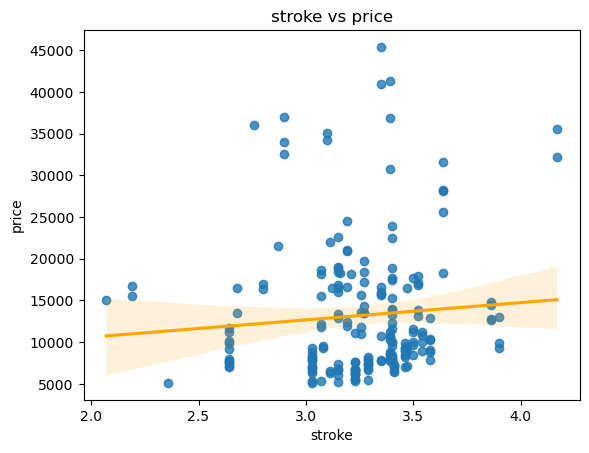

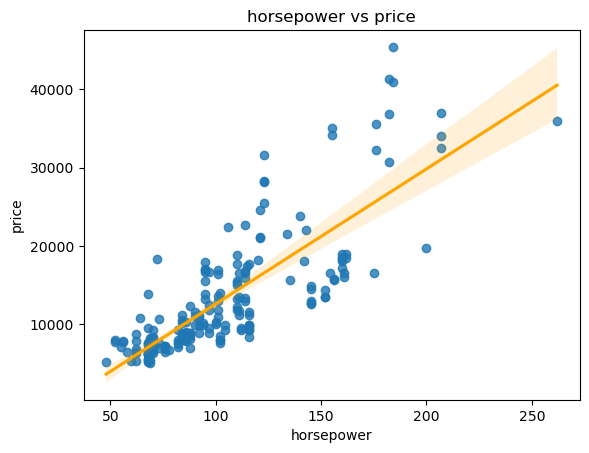

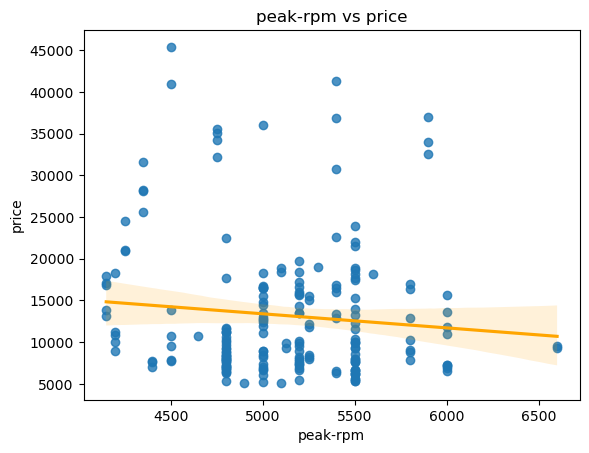

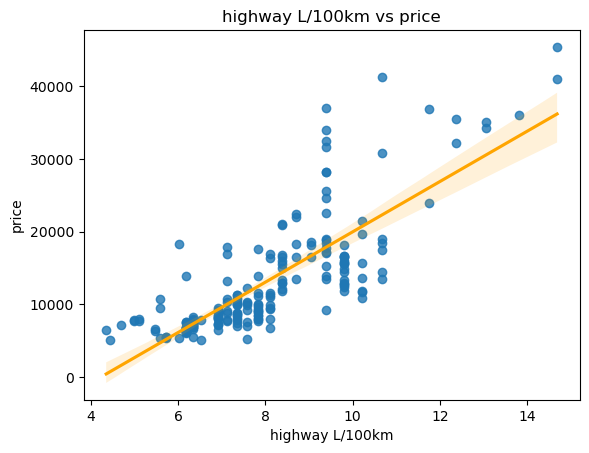

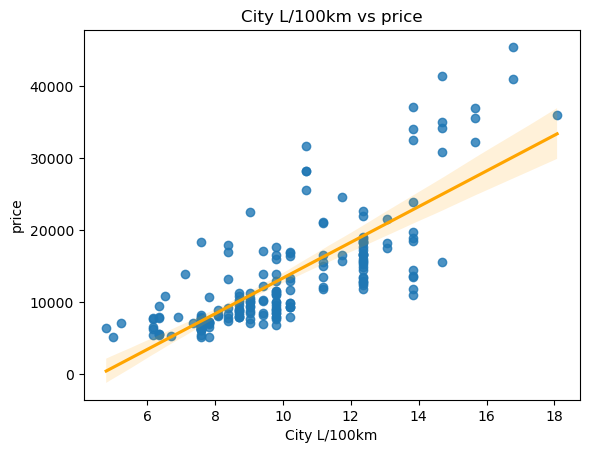

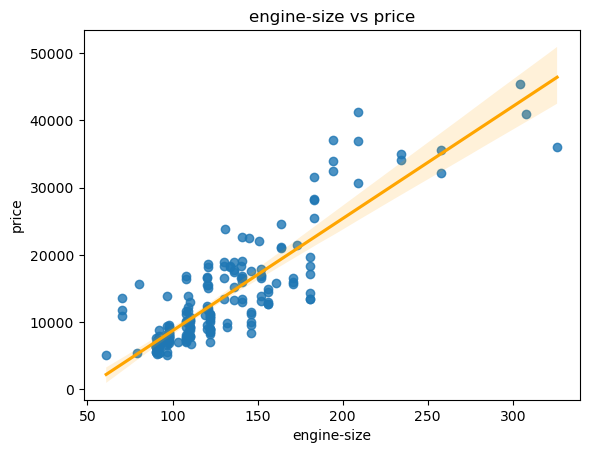

In [32]:
# regplot x_varible  vs price
x_variable=['curb-weight','bore','stroke','horsepower','peak-rpm','highway L/100km','City L/100km','engine-size']
for y_b in x_variable:
    sns.regplot(x=y_b,y='price',data=df,line_kws={'color':'orange'})
    plt.xlabel(y_b)
    plt.ylabel('price')
    plt.title(f'{y_b} vs price')
    plt.show()

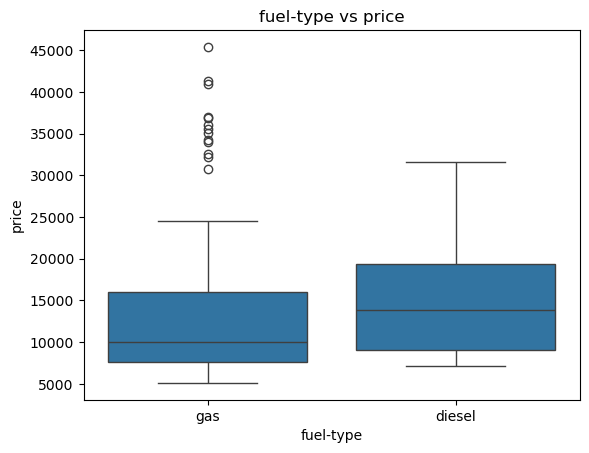

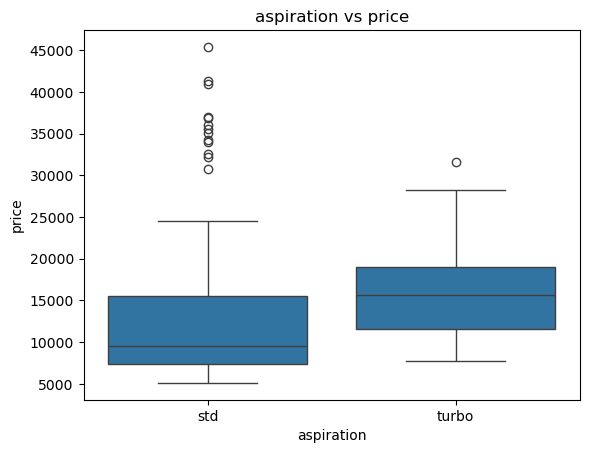

In [33]:
# boxplot all x_variable vs price 
x_variable=['fuel-type','aspiration']
for x_v in x_variable:
    sns.boxplot(x=x_v,y='price',data=df)
    plt.xlabel(x_v)
    plt.ylabel('price')
    plt.title(f'{x_v} vs price')
    plt.show()
    

### By seeing the above visualizations we can say that the following features can be used for further analysis
##### Numerical variable
1. curb weight : positive reggresion
2. bore 
3. horseprice
4. highway L/100km
5. City L/100km 
6. engine-size
##### Categorical variable
1. fuel-type
2. aspiration


### Pearson coefficient evaluation
1. 1: perfect positive
2. 0: no relation
3. -1: perfect negative
### P-Value 
1. <0.001 : strongly significant
2. <0.05  : moderatly significant
3. <0.1 :  weakly significant
4. .>0.1 : no significance

In [34]:
i=['curb-weight','bore','horsepower','highway L/100km','City L/100km','engine-size']
for x in i:
    coef,pval=pearsonr(df[x],df['price'])
    print(f'The pearson Coefficient for variable {x} is : {coef} and p value is {pval}')

The pearson Coefficient for variable curb-weight is : 0.8344145257702845 and p value is 2.189577238893965e-53
The pearson Coefficient for variable bore is : 0.5431549770315166 and p value is 8.049696658365048e-17
The pearson Coefficient for variable horsepower is : 0.8095740806169782 and p value is 6.370509683528908e-48
The pearson Coefficient for variable highway L/100km is : 0.8011176263981976 and p value is 3.0467845810411344e-46
The pearson Coefficient for variable City L/100km is : 0.7898975136626943 and p value is 3.9031064009394357e-44
The pearson Coefficient for variable engine-size is : 0.8723351674455185 and p value is 9.265491622198793e-64


### Relations that show high relationship with price
1. curb-weight positive
2. bore moderate
3. horsepower positive
4. highway L/100km positive
5. city l/100km positive
6. engine-size
7. aspiration
8. fuel-type

### Building models

In [35]:
%pip install scikit-learn  

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


### Creating a simple linear regression model without pipeline

In [36]:

# Importing necessary libraries for building models
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split

# creating a model variable
lm=LinearRegression()

# Assigning the feature variable and target variable
x_data=df[['curb-weight','bore','horsepower','highway L/100km','City L/100km','engine-size']]
y_data=df[['price']]

# Splitting the data into training and testing sets
x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.1,random_state=0)

# Fitting the model to the training set
lm.fit(x_train,y_train)

# Printing the coefficients and intercept of the model
print('Co-efficients: ',lm.coef_)
print('Intersept: ',lm.intercept_)

# Making predictions on the test set
ypred=lm.predict(x_test)

# Evaluating the model
mse = mean_squared_error(y_test, ypred)
score = r2_score(y_test, ypred)
print(f"R-Squared score with Simple linear Regression: {score:.4f}")
print(f"Mean Squared Error with Simple Linear Regression: {mse:.2f}")


Co-efficients:  [[    4.44135378 -1595.53182038     7.12673313  -109.92156282
    753.40376605    90.30004952]]
Intersept:  [-11616.15210221]
R-Squared score with Simple linear Regression: 0.6368
Mean Squared Error with Simple Linear Regression: 17680392.08


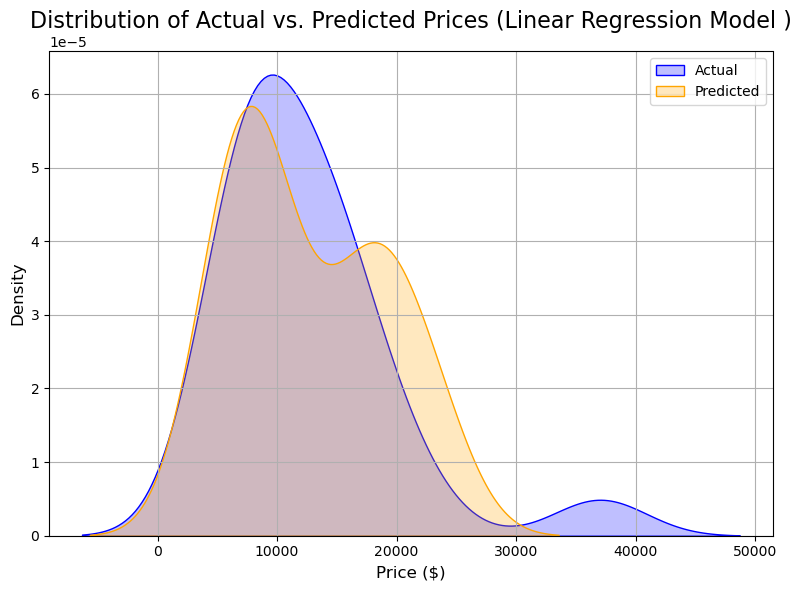

In [37]:
# Visualizing Actual vs Predicted values

plt.figure(figsize=(8, 6))
sns.kdeplot(y_test, label='Actual', fill=True, palette=["blue"])
sns.kdeplot(ypred, label='Predicted', fill=True, palette=["orange"])
plt.xlabel('Price ($)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.title('Distribution of Actual vs. Predicted Prices (Linear Regression Model )', fontsize=16)
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()


### Creating a simple linear regression model with Pipeline

In [38]:
# Importing all the required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error



df = df.dropna(subset=['price']) 
df['price'] = df['price'].astype('float')

# Define features X and target y
features = ['horsepower', 'engine-size', 'fuel-type', 'aspiration', 'curb-weight']
target = 'price'

X = df[features].copy()
y = df[target]

# Identify which columns need which type of preprocessing
numeric_features = ['horsepower', 'engine-size', 'curb-weight']
categorical_features = ['fuel-type', 'aspiration']

# Creating a pipeline for numerical features
# 1 Replacing missing values with mean
# 2 Scale the features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Create a pipeline for categorical features
# 1 Replacing missing values with mode
# 2 One-hot encode the features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


# This object applies the correct transformer to the correct columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])


# 1 Apply the 'preprocessor' ColumnTransformer
# 2 Feed the processed data into the Linear Regression model
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fitting the model pipeline to the training set
model_pipeline.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model_pipeline.predict(X_test)

# Evaluate the model
score = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error with pipeline: {mse:.2f}")
print(f"R-squared score with pipeline: {score:.4f}")


Mean Squared Error with pipeline: 26765883.16
R-squared score with pipeline: 0.7812


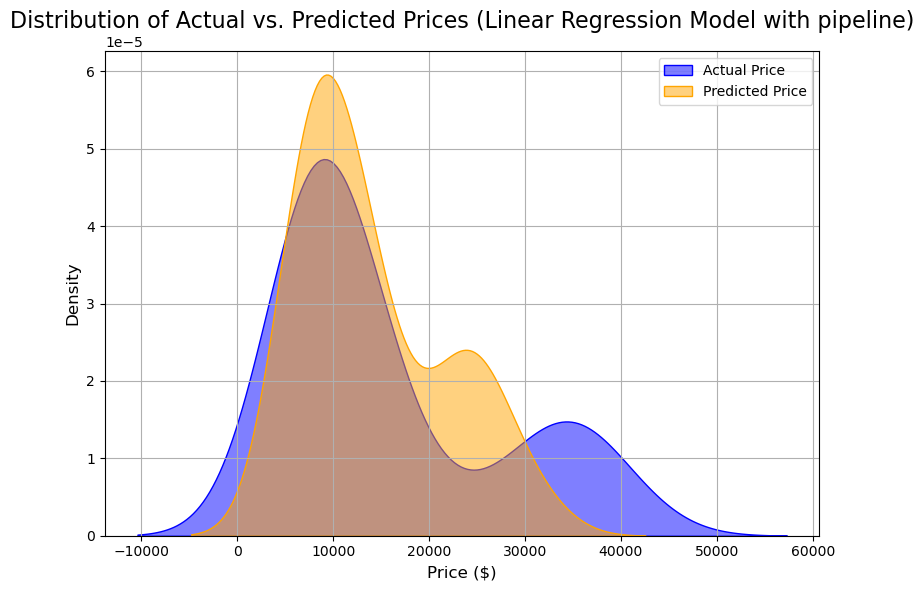

In [39]:
# Visualizing Actual vs Predicted values for simple linear regression model with pipeline

plt.figure(figsize=(8, 6))
sns.kdeplot(y_test, label='Actual Price', fill=True, color='blue', alpha=0.5)
sns.kdeplot(y_pred, label='Predicted Price', fill=True, color='orange', alpha=0.5)
plt.title('Distribution of Actual vs. Predicted Prices (Linear Regression Model with pipeline)', fontsize=16)
plt.xlabel('Price ($)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Creating a Random Forest Regression Model with Pipeline


In [40]:
# Importing all the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error



df = df.dropna(subset=['price']) 
df['price'] = df['price'].astype('float')

# Define features X and target y
features = ['horsepower', 'engine-size', 'fuel-type', 'aspiration', 'curb-weight']
target = 'price'

X = df[features].copy()
y = df[target]

# Define your feature lists 
numeric_features = ['horsepower', 'engine-size', 'curb-weight']
categorical_features = ['fuel-type', 'aspiration']



# Build the Preprocessing Pipelines
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformers with ColumnTransformer 
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Creating  the Final full Pipeline
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42)) 
])

# Train and Evaluate the Pipeline
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  Apply log transform to the target variable
y_train_log = np.log(y_train)

# Fit the ENTIRE pipeline on the training data
model_pipeline.fit(X_train, y_train_log)

# Make predictions 
y_pred_log = model_pipeline.predict(X_test)

# Convert predictions back to original dollar scale
y_pred = np.exp(y_pred_log)

# Evaluate the model
score = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error with RandomForest pipeline: {mse:.2f}")
print(f"R-squared score with RandomForest pipeline: {score:.4f}")

Mean Squared Error with RandomForest pipeline: 10489000.85
R-squared score with RandomForest pipeline: 0.9143


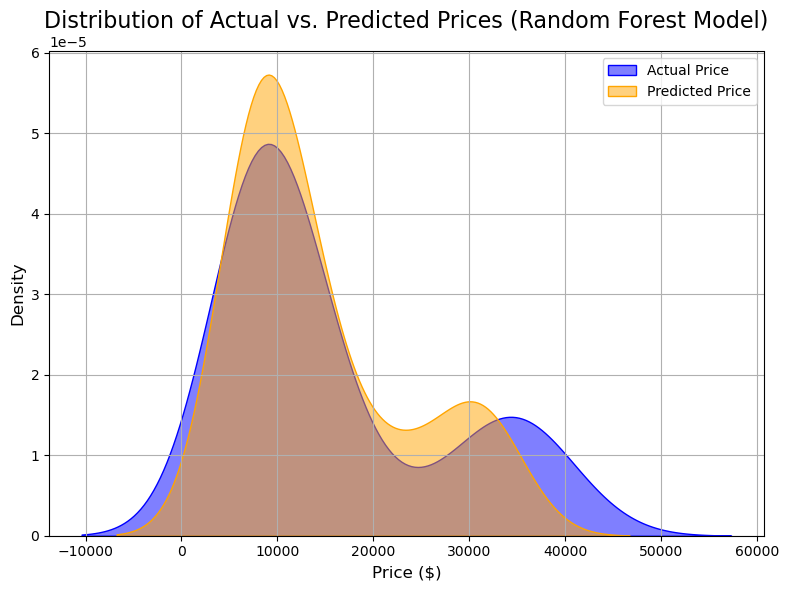

In [41]:
# Visualizing Actual vs Predicted values for Random Forest model with pipeline

plt.figure(figsize=(8, 6))
sns.kdeplot(y_test.squeeze(), label='Actual Price', fill=True, color='blue', alpha=0.5)
sns.kdeplot(y_pred.squeeze(), label='Predicted Price', fill=True, color='orange', alpha=0.5)
plt.title('Distribution of Actual vs. Predicted Prices (Random Forest Model)', fontsize=16)
plt.xlabel('Price ($)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

##  Model Comparison

| Model | Target Variable | R-squared (R²) Score | Mean Squared Error |
| :--- | :--- | :--- | :--- |
| Linear Regression without pipeline | `Price` | 0.6368 | 17680392.08 |
| Linear Regression with pipeline | `price` | 0.7812 | 26765883.16 |
| Random Forest | `np.log(price)` | 0.9143 | 10489000.85 |

### Conclusion
The Random Forest Regressor, combined with a log-transform of the target variable, performed significantly better. This is because the log-transform fixed the price skewness, and the Random Forest model was able to capture complex, non-linear relationships in the data that the simple Linear Regression model missed.

## Summary & Conclusion

This project successfully demonstrated a complete machine learning workflow for predicting automobile prices.

1.  **Data Loading & Cleaning:** The notebook began by loading the raw `auto.csv` dataset, identifying, and replacing missing values (represented by `?`) with `np.nan`.

2.  **Preprocessing Pipeline:** A `ColumnTransformer` and `Pipeline` were built to handle data preprocessing. This approach is crucial as it **prevents data leakage** by ensuring that statistics (like mean/mode for imputation and parameters for `StandardScaler`) are learned *only* from the training data.
    * **Numerical Features:** Imputed missing values using the `mean` and then scaled using `StandardScaler`.
    * **Categorical Features:** Imputed missing values using the `most_frequent` and then transformed using `OneHotEncoder`.

3.  **Exploratory Data Analysis (EDA):** Visual analysis revealed that the `price` variable was heavily right-skewed. Key features like `engine-size`, `curb-weight`, and `horsepower` showed a strong positive correlation with price.

4.  **Model Comparison:**
    * A **Simple Linear Regression** model was trained first, achieving an $R^2$ score of **0.7812**. The KDE plot showed it struggled to predict higher-priced vehicles.
    * A **Random Forest Regressor** was then trained using a **log-transform** on the `price` variable to correct for its skewness. This model performed significantly better, capturing the complex, non-linear patterns in the data.

**Final Result:** The **Random Forest Regressor** achieved an $R^2$ score of **0.9143** and a Mean Sqaured Error of **10489000.85** , providing a strong and accurate model for predicting automobile prices.